In [6]:
!pip install -U cvxopt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# **FINAL PROJECT _ Optimization Methods for Data Science** 
### A.A. 2024-2025

**Pinos Gabriel** - 1965035  
**Federico Lattanzio** - 1886519

pinos.1965035@studenti.uniroma1.it  
lattanzio.1886519@studenti.uniroma1.it

In [7]:
# Import all the necessary modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

## **Dataset overview**
--------
**Read all the 3 datasets and take a look to them**

The UTKFace-derived datasets contain features extracted via a ResNet backbone.
Each dataset includes:

- A number of columns labeled `feat_i`, which are the ResNet features.
- A final column `gt`, which is the ground truth label:
  - `AGE_PREDICTION.csv`: age values (float, from 0 to 100)
  - `GENDER_CLASSIFICATION.csv`: binary (0 = Female, 1 = Male)
  - `ETHNICITY_CLASSIFICATION.csv`: integer from 0 to 4 (5 ethnicity classes)

We will first explore the structure and content of the datasets to understand their dimensions and distributions.


In [8]:
age_df = pd.read_csv("dataset\AGE_PREDICTION.csv")
ethnicity_df = pd.read_csv("dataset\ETHNICITY_CLASSIFICATION.csv")
gender_df = pd.read_csv("dataset\GENDER_CLASSIFICATION.csv")

We begin by inspecting the first few rows and the label distribution of the `ETHNICITY_CLASSIFICATION.csv` dataset.

First 10 entries in GENDER_CLASSIFICATION dataset:


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,gt
0,-0.900846,0.102587,-0.397814,0.112796,2.588096,-0.192754,-0.968311,-0.490886,-0.872099,-0.288411,...,2.541431,1.739102,0.166066,4.584869,-0.107031,-0.913990,-0.686416,-0.368085,-0.870545,0
1,-0.838868,0.039976,-0.387101,0.055413,2.066874,-0.226948,-0.947416,-0.472817,-0.855387,-0.207101,...,1.991721,1.259745,0.065058,3.019790,-0.110633,-0.890023,-0.611625,-0.298235,-0.855208,0
2,-0.814961,-0.010184,-0.397147,0.092713,1.897454,-0.269387,-0.945285,-0.449579,-0.849705,-0.151179,...,1.822978,1.105511,0.065353,2.500681,-0.052730,-0.885691,-0.583346,-0.218140,-0.856456,0
3,-0.110470,0.027849,-0.044310,-0.005343,0.177831,-0.232092,-0.562700,-0.400713,-0.552356,0.037349,...,-0.098367,-0.370318,-0.123008,-0.861314,0.106840,-0.483669,-0.224164,0.147321,-0.615051,0
4,-0.626313,-0.091985,-0.373756,-0.005083,1.172486,-0.314868,-0.885046,-0.412587,-0.818729,-0.012022,...,1.030348,0.421886,-0.068029,0.258984,-0.057158,-0.834079,-0.441066,-0.099874,-0.829539,0
5,-0.941448,0.165438,-0.392049,0.205172,3.134455,-0.161057,-0.982058,-0.499061,-0.884788,-0.341288,...,3.115495,2.232003,0.289214,6.179787,-0.052086,-0.932607,-0.753994,-0.415275,-0.885618,0
6,-0.624388,-0.080687,-0.366623,-0.049865,1.192401,-0.295711,-0.877278,-0.429471,-0.818519,-0.060946,...,1.045350,0.420301,-0.071344,0.328387,-0.099864,-0.831247,-0.436137,-0.157848,-0.824938,0
7,-0.360967,-0.055136,-0.222737,0.087353,0.521053,-0.297690,-0.790068,-0.485822,-0.745810,0.106832,...,0.249262,-0.195481,-0.132257,-0.800665,0.101134,-0.720496,-0.286264,0.140425,-0.767403,0
8,-0.313211,-0.053253,-0.220183,0.105120,0.460798,-0.311198,-0.772821,-0.473726,-0.724301,0.113229,...,0.173077,-0.230969,-0.142840,-0.830226,0.126386,-0.694164,-0.241437,0.184116,-0.760070,0
9,1.353326,-0.034194,0.277299,-0.471843,-0.809794,0.672951,2.717927,0.928540,1.897364,-0.233773,...,-0.782136,-0.502159,0.089402,-0.468237,-0.194680,2.013506,0.288960,-0.001121,1.840473,0



 - Total samples: 1000
 - Feature columns: 32 (excluding target 'gt')


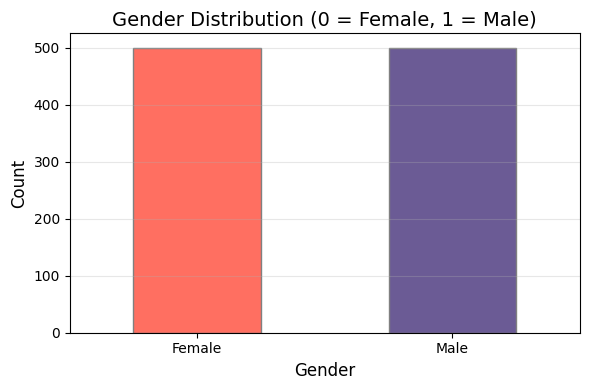

In [9]:
# Preview
print("First 10 entries in GENDER_CLASSIFICATION dataset:")
display(gender_df.head(10))

# Dataset size
print(f"\n - Total samples: {len(gender_df)}")
print(f" - Feature columns: {gender_df.shape[1] - 1} (excluding target 'gt')")

# Gender distribution
plt.figure(figsize=(6, 4))
gender_df['gt'].value_counts().sort_index().plot(kind='bar', color=['#FF6F61', '#6B5B95'], edgecolor='grey')
plt.title("Gender Distribution (0 = Female, 1 = Male)", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Female", "Male"], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **Part 2: Support Vector Machines (SVM) for Gender Classification**
----

In this part of the project, we address the binary classification task of predicting gender using features extracted from the UTKFace dataset. The dataset `GENDER CLASSIFICATION.csv` contains image embeddings obtained via a pretrained ResNet, with labels indicating gender (0 or 1). The goal is to train a Support Vector Machine (SVM) classifier to accurately distinguish between the two classes.

### **Objective**

We implement and analyze two optimization-based approaches to train a nonlinear SVM classifier:

- **Question 2**: Solve the SVM **dual quadratic problem** using the **CVXOPT** library and select the best hyperparameters via **k-fold cross-validation**.
- **Question 3**: Implement the **Most Violating Pair (MVP)** decomposition method with subproblem dimension fixed to 2, using analytical updates for each iteration.

Both methods are evaluated in terms of classification performance and computational efficiency.

### **Theoretical background**

A **Support Vector Machine (SVM)** is a powerful supervised learning model used for classification tasks. The idea is to find the optimal separating hyperplane in a transformed feature space induced by a kernel function.

The decision function for the nonlinear SVM is defined as:

$$
y(x) = \text{sign}\left( \sum_{i=1}^{L} \lambda_i y_i k(x_i, x) + b \right)
$$

where:
- $x_i$ are the training points,
- $y_i \in \{-1, 1\}$ are the labels (the original labels will be mapped accordingly),
- $\lambda_i$ are the Lagrange multipliers,
- $k(\cdot, \cdot)$ is the kernel function,
- $b$ is the bias term.

The **dual problem** formulation is:

$$
\max_{\lambda} \sum_{i=1}^{N} \lambda_i - \frac{1}{2} \sum_{i,j=1}^{N} \lambda_i \lambda_j y_i y_j k(x_i, x_j)
$$
subject to:
$$
0 \leq \lambda_i \leq C, \quad \sum_{i=1}^{N} \lambda_i y_i = 0
$$

---
To enable nonlinear decision boundaries, we use **kernel functions** to implicitly map data into higher-dimensional spaces:

- **Gaussian (RBF) Kernel**:
  $$
  K(x, x') = e^{-\gamma \|x - x'\|^2}
  $$
- **Polynomial Kernel**:
  $$
  K(x, x') = (x^\top x' + 1)^p
  $$

Each kernel introduces one or more hyperparameters (e.g., $\gamma$, $p$) that control the complexity and smoothness of the decision boundary.

---

The following hyperparameters must be tuned using **k-fold cross-validation**:

- $C$: regularization parameter that controls the trade-off between margin size and classification error
- $\gamma$: Gaussian kernel width (for RBF)
- $p$: degree of the polynomial (for Polynomial kernel)

-----


### **Setup and Data Loading**

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import our custom SVM utilities
from src.svm_utils import (
    cross_validate_svm, train_final_svm, predict, 
    build_dual_problem, solve_svm_dual, compute_bias
)

# Load and prepare the data
# Note: Replace 'gender_df' with your actual dataset loading
# gender_df = pd.read_csv('your_dataset.csv')  # Example

# Prepare features and labels
X = gender_df.drop(columns=['gt']).values
y = gender_df['gt'].values

# Convert labels to {-1, +1} format for SVM
y_svm = np.where(y == 0, -1, 1)

print(f"Dataset shape: {X.shape}")
print(f"Number of positive samples: {np.sum(y_svm == 1)}")
print(f"Number of negative samples: {np.sum(y_svm == -1)}")

Dataset shape: (1000, 32)
Number of positive samples: 500
Number of negative samples: 500


### **Hyperparameter Tuning with Cross-Validation**

In [11]:
# Define hyperparameter search space
C_values = [0.1, 1, 10]           # Regularization parameter
gamma_values = [0.001, 0.01, 0.1] # RBF kernel parameter

print("Starting cross-validation for hyperparameter tuning...")
print("=" * 50)

# Perform 5-fold cross-validation
cv_results = cross_validate_svm(X, y_svm, C_values, gamma_values, k=5)

# Extract best hyperparameters
best_C, best_gamma, best_score = cv_results[0]
print("=" * 50)
print(f"Best hyperparameters found:")
print(f"  C = {best_C}")
print(f"  gamma = {best_gamma}")
print(f"  Cross-validation accuracy = {best_score:.4f}")

Starting cross-validation for hyperparameter tuning...
Error with C=0.1, gamma=0.001: No support vectors found.
C=0.1, gamma=0.001, CV accuracy=0.7330
C=0.1, gamma=0.01, CV accuracy=0.9150
C=0.1, gamma=0.1, CV accuracy=0.9150
C=1, gamma=0.001, CV accuracy=0.9160
C=1, gamma=0.01, CV accuracy=0.9140
C=1, gamma=0.1, CV accuracy=0.9170
C=10, gamma=0.001, CV accuracy=0.9130
C=10, gamma=0.01, CV accuracy=0.9180
C=10, gamma=0.1, CV accuracy=0.9140
Best hyperparameters found:
  C = 10
  gamma = 0.01
  Cross-validation accuracy = 0.9180


### **Data Splitting**

In [12]:
# Split data: 80% for training+validation, 20% for final testing
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_svm, test_size=0.2, random_state=42, stratify=y_svm
)

print(f"Training set size: {X_trainval.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 800
Test set size: 200


### **Final Model Training**

In [13]:
# Train final SVM model with best hyperparameters
print("Training final SVM model...")

kernel_params = {'type': 'rbf', 'gamma': best_gamma}
lambdas, bias, solution = train_final_svm(X_trainval, y_trainval, kernel_params, best_C)

print("Training completed successfully!")
print(f"Number of support vectors: {np.sum(lambdas > 1e-5)}")
print(f"Bias term: {bias:.6f}")

Training final SVM model...
Training completed successfully!
Number of support vectors: 392
Bias term: -0.790482


### **Model Evaluation**

In [14]:
# Make predictions on test set
y_pred_test = predict(
    X_trainval, y_trainval, lambdas, bias, kernel_params, X_test
)

# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("=" * 40)
print("FINAL RESULTS")
print("=" * 40)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Accuracy (%): {test_accuracy * 100:.2f}%")
print()
print("Confusion Matrix:")
print(conf_matrix)


FINAL RESULTS
Test Set Accuracy: 0.9200
Test Set Accuracy (%): 92.00%

Confusion Matrix:
[[93  7]
 [ 9 91]]


### **Optimization Details**

In [15]:
# Display optimization information
print("=" * 40)
print("OPTIMIZATION DETAILS")
print("=" * 40)
print(f"Number of iterations: {solution['iterations']}")
print(f"Initial objective value (estimated): 0.0000")
print(f"Final objective value: {solution['primal objective']:.6f}")
print(f"Optimization status: {solution['status']}")

OPTIMIZATION DETAILS
Number of iterations: 21
Initial objective value (estimated): 0.0000
Final objective value: -1504.266529
Optimization status: optimal


### **Visualization**

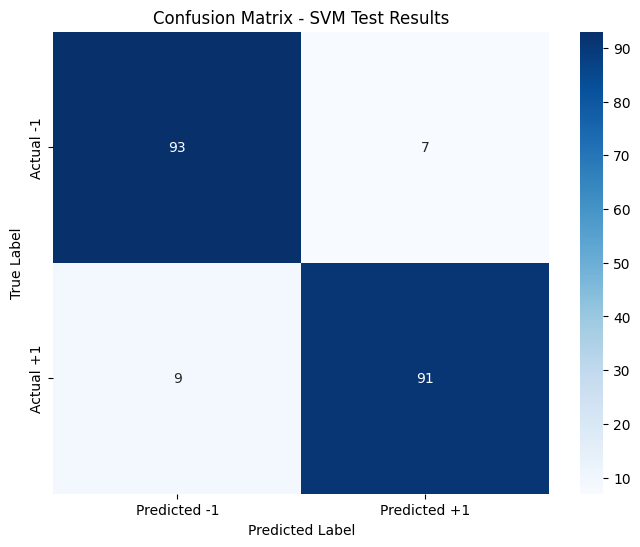

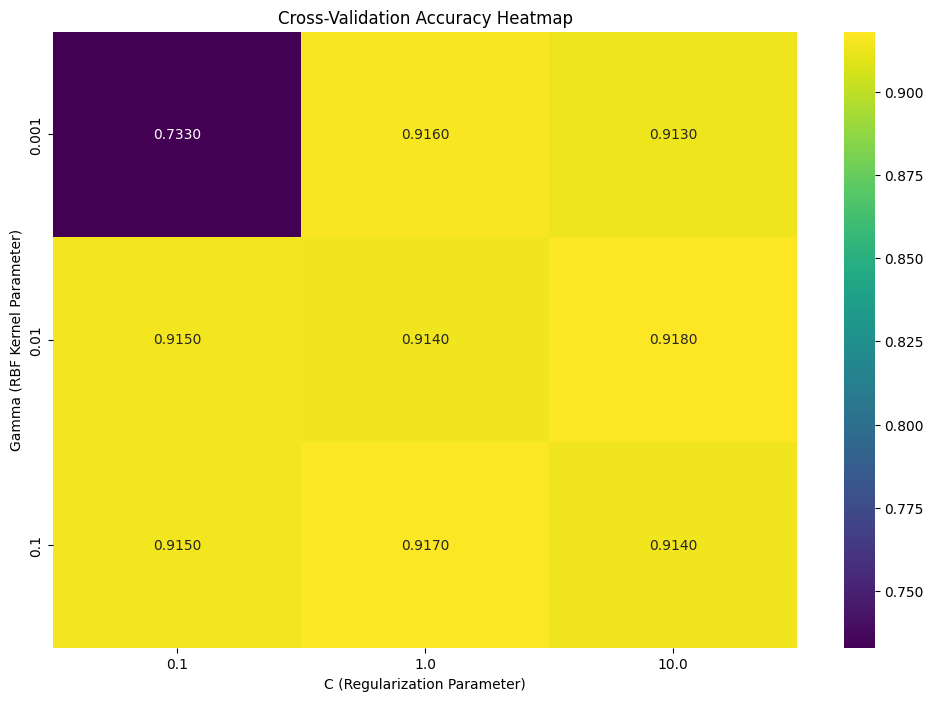

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted -1', 'Predicted +1'],
            yticklabels=['Actual -1', 'Actual +1'])
plt.title('Confusion Matrix - SVM Test Results')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot cross-validation results
plt.figure(figsize=(12, 8))
cv_df = pd.DataFrame(cv_results, columns=['C', 'gamma', 'accuracy'])

# Create heatmap of CV results
pivot_table = cv_df.pivot(index='gamma', columns='C', values='accuracy')
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='viridis')
plt.title('Cross-Validation Accuracy Heatmap')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Gamma (RBF Kernel Parameter)')
plt.show()

### **Summary Statistics**

In [17]:
# Print comprehensive summary
print("=" * 50)
print("COMPREHENSIVE SUMMARY")
print("=" * 50)
print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Best hyperparameters: C={best_C}, gamma={best_gamma}")
print(f"Cross-validation accuracy: {best_score:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Number of support vectors: {np.sum(lambdas > 1e-5)}")
print(f"Support vector ratio: {np.sum(lambdas > 1e-5) / len(lambdas):.2%}")
print(f"Optimization converged in {solution['iterations']} iterations")

# Classification report
from sklearn.metrics import classification_report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=['Class -1', 'Class +1']))

COMPREHENSIVE SUMMARY
Dataset: 1000 samples, 32 features
Best hyperparameters: C=10, gamma=0.01
Cross-validation accuracy: 0.9180
Test accuracy: 0.9200
Number of support vectors: 392
Support vector ratio: 49.00%
Optimization converged in 21 iterations

Detailed Classification Report:
              precision    recall  f1-score   support

    Class -1       0.91      0.93      0.92       100
    Class +1       0.93      0.91      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

